In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

In [18]:
california_data = fetch_california_housing()

In [19]:
df = pd.DataFrame(california_data.data, columns=california_data.feature_names)
df['MedHouseVal'] = california_data.target

In [20]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [21]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


<Axes: >

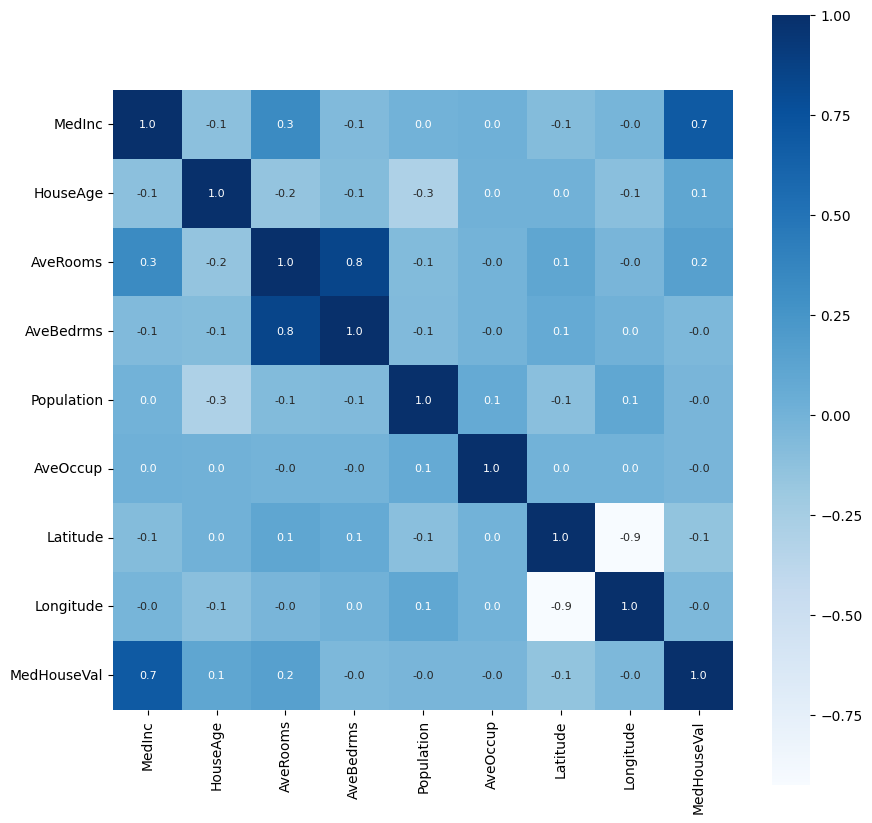

In [22]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [23]:
X = df.drop(["MedHouseVal"],axis=1)
Y = df['MedHouseVal']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
model = XGBRegressor()


In [25]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
training_data_precission = model.predict(X_train)

print(training_data_precission)

[1.2811276 3.5806673 1.795477  ... 2.308142  2.5287933 3.645046 ]


In [32]:
score_1 = metrics.r2_score(Y_train, training_data_precission)
print('El R**2 es igual a ', score_1)
score_2 = metrics.r2_score(Y_train, training_data_precission)
print('El error medio absoluto es igual a ', score_2)


El R**2 es igual a  0.9445725845802867
El error medio absoluto es igual a  0.9445725845802867


In [33]:
test_data_precission = model.predict(X_test)

print(test_data_precission)

[0.5944522  0.7841187  5.1981163  ... 5.058281   0.76106036 1.8375903 ]


In [35]:
score_1_test = metrics.r2_score(Y_test, test_data_precission)
print('El R**2 es igual a ', score_1_test)
score_2_test = metrics.r2_score(Y_test, test_data_precission)
print('El error medio absoluto es igual a ', score_2_test)



El R**2 es igual a  0.8301370561019205
El error medio absoluto es igual a  0.8301370561019205


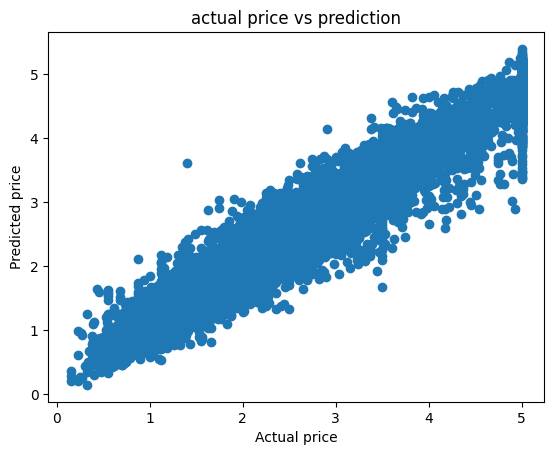

In [36]:
plt.scatter(Y_train, training_data_precission)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('actual price vs prediction')
plt.show()